**1. Load the dataset**

In [1]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [2]:
#IMPORT LOAD DATA
data=pd.read_csv('salarydata.csv')

In [3]:
#IMPORT READ DATA
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.tail()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
#CHECK DATA INFORMATION
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [6]:
#DESCRIBE DATA
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [7]:
#CHECK SHAPE OF DATA
data.shape

(32561, 14)

In [8]:
#CHECK DATA COLUMNS
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary'],
      dtype='object')

In [9]:
#CHECK UNIQUE VALUES
data.nunique()

age                73
workclass           9
education          16
education-num      16
marital-status      7
occupation         15
relationship        6
race                5
sex                 2
capital-gain      119
capital-loss       92
hours-per-week     94
native-country     42
salary              2
dtype: int64

**2. Exploratory Data Analysis (EDA)**

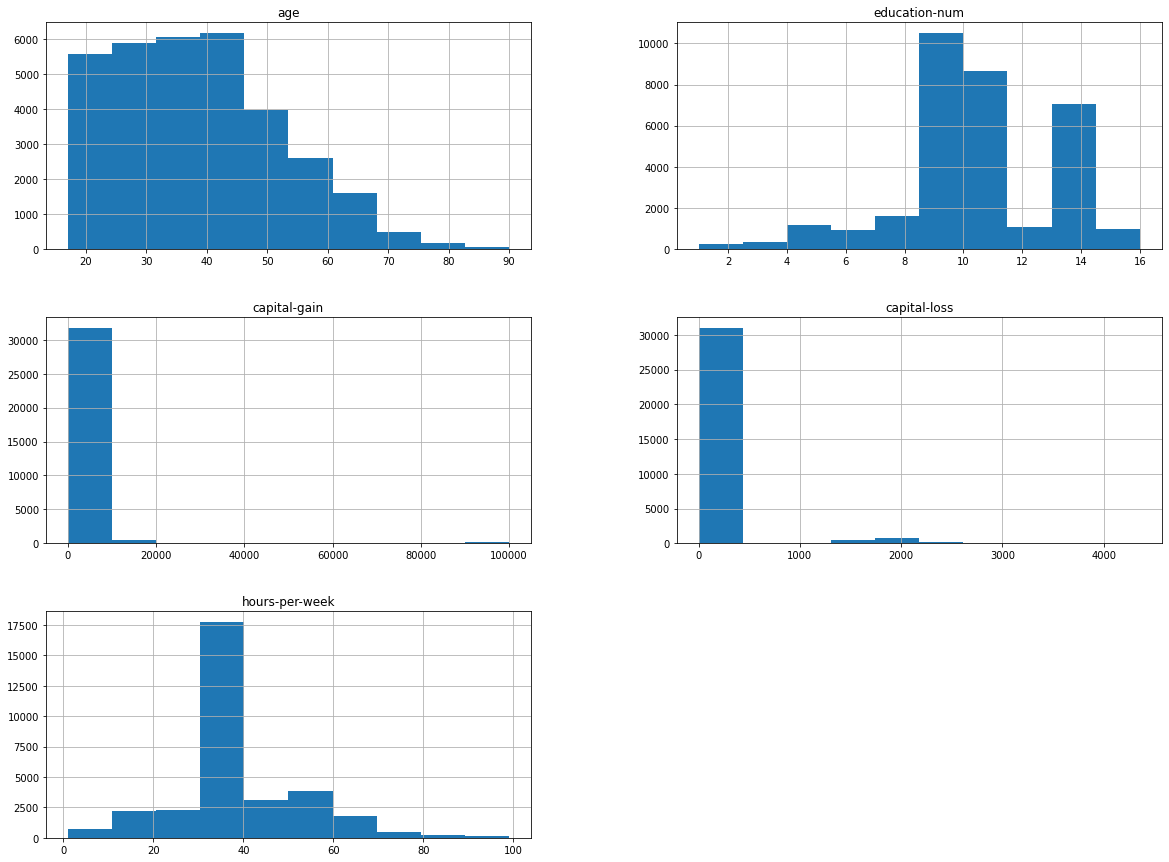

In [10]:
data.hist(figsize=(20,15))
plt.show()

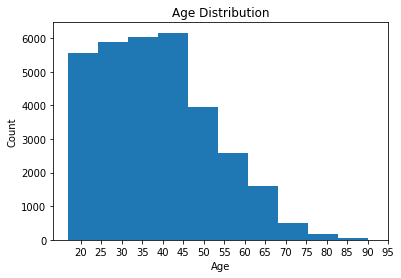

In [11]:
plt.hist(data['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(np.arange(20,100,5))
plt.rcParams['figure.figsize'] = (10,10)
plt.title('Age Distribution')
plt.show()

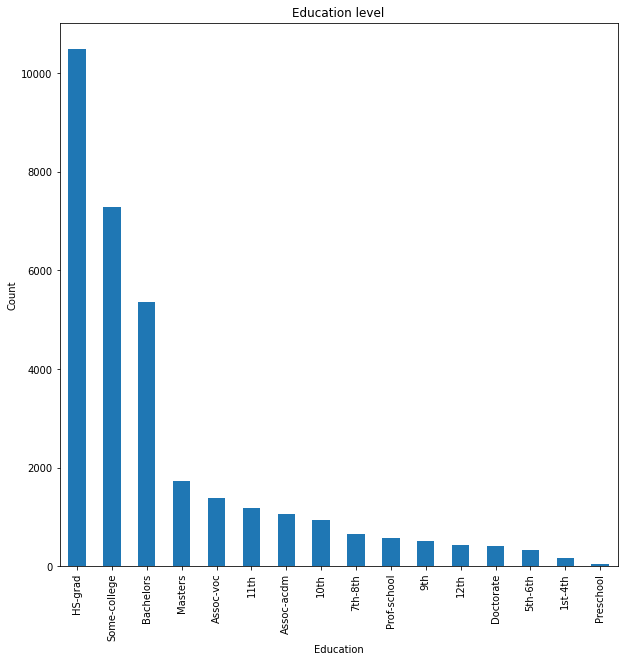

In [12]:
data['education'].value_counts().plot(kind = 'bar')
plt.xlabel('Education')
plt.ylabel('Count')
plt.rcParams['figure.figsize'] = (10,10)
plt.title('Education level')
plt.show()

Text(0.5, 1.0, 'gender count')

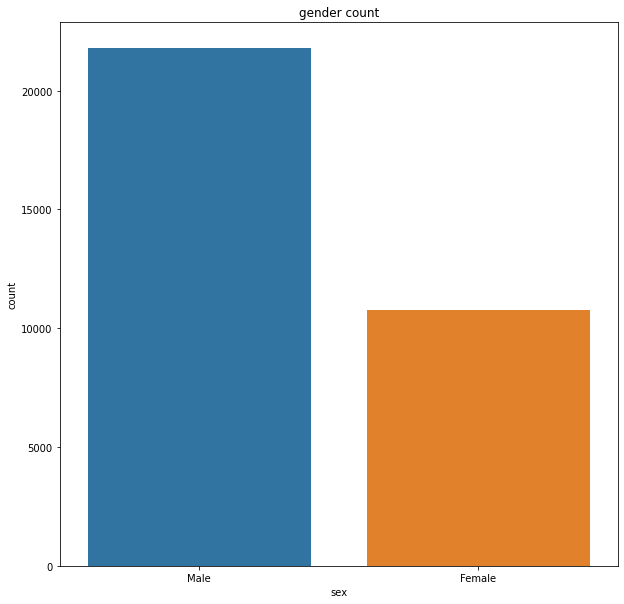

In [13]:
sns.countplot(x=data['sex'])
plt.title('gender count')

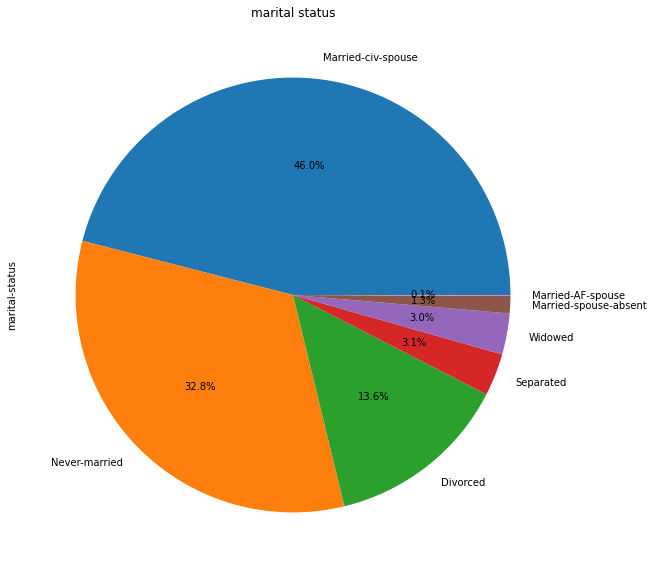

In [14]:
data['marital-status'].value_counts().plot(kind = 'pie',subplots=True, autopct='%1.1f%%')
plt.rcParams['figure.figsize'] = (10,10)
plt.title('marital status')
plt.show()

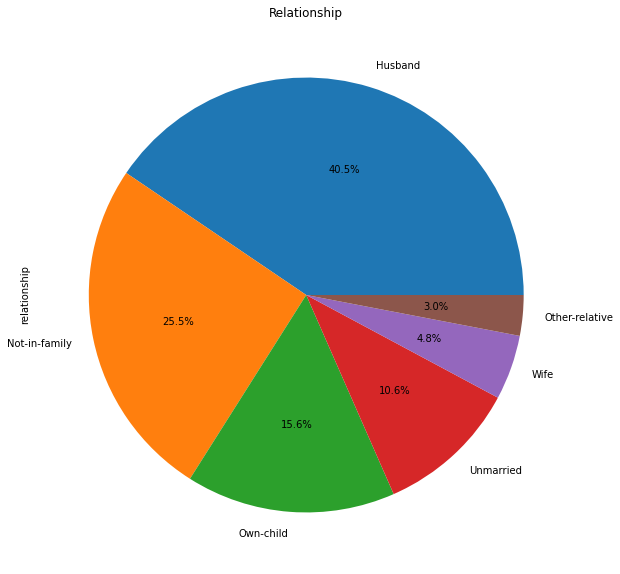

In [15]:
data['relationship'].value_counts().plot(kind = 'pie',subplots=True, autopct='%1.1f%%')
plt.rcParams['figure.figsize'] = (10,10)
plt.title('Relationship')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

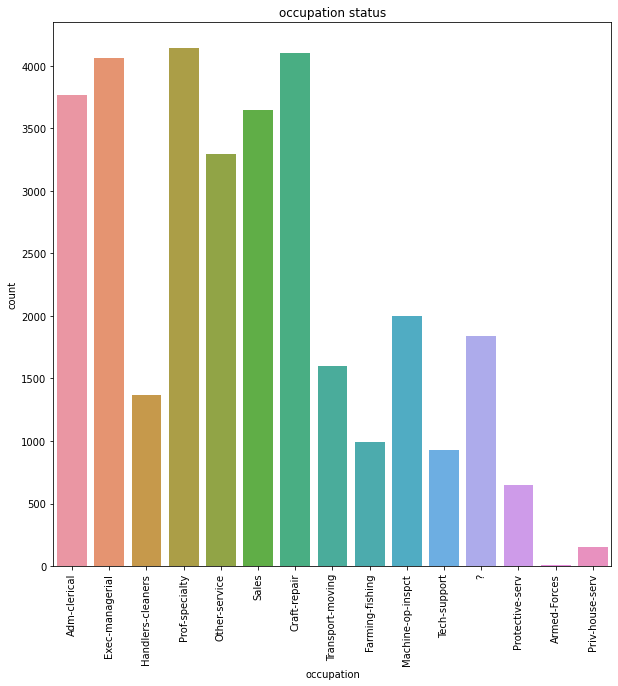

In [16]:
sns.countplot(x=data['occupation'])
plt.xticks(rotation=90)
plt.title('occupation status')
plt.show

**2.Data Preprocessing**

**2.1.HANDLING MISSING VALUES**

In [17]:
#check null values
data.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [18]:
#CHECK DATA TYPES
data.dtypes

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

REPLACED MISSING VALUES WITH MEAN

In [19]:
for i in ['capital-gain','capital-loss', 'hours-per-week']:
      data[i]=data[i].fillna(data[i].mean())

REPLACED MISSING VALUES(CATEGORICAL) WITH MODE

In [20]:
for i in ['sex','native-country', 'salary']:
      data[i]=data[i].fillna(data[i].mode()[0])

In [21]:
#RECHECK NULL VALUES
data.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

**2.2 CORRELATION**

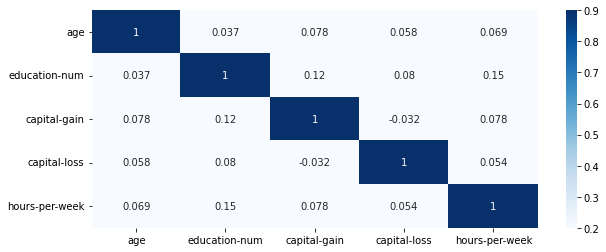

In [22]:
corrmatrix=data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,vmin=0.2,vmax=0.9,annot=True,cmap='Blues')

DROP UNNECESSARY COLUMNS

In [23]:
data.drop(['capital-gain','capital-loss','education-num'], axis = 1,inplace = True)


**2.3 REMOVING OR MODIFYING OUTLIERS**

OUTLIER DETECTION

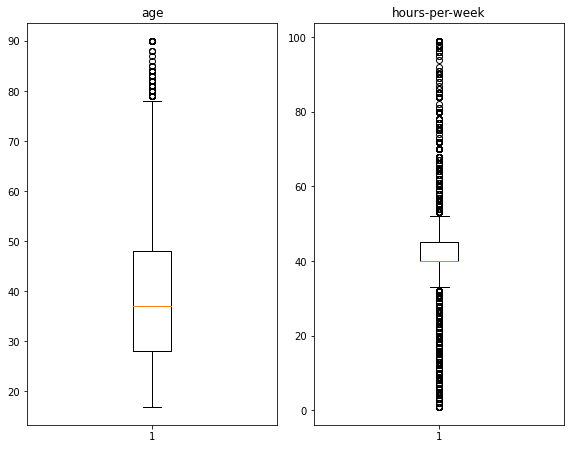

In [24]:
num_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(num_col):
                     plt.subplot(5,5,i+1)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

MODIFYING OUTLIERS

In [25]:
for i in num_col:
    Q1=data[i].quantile(0.25) # 25th quantile
    Q3=data[i].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    data[i] = np.clip(data[i], Lower_Whisker, Upper_Whisker) 

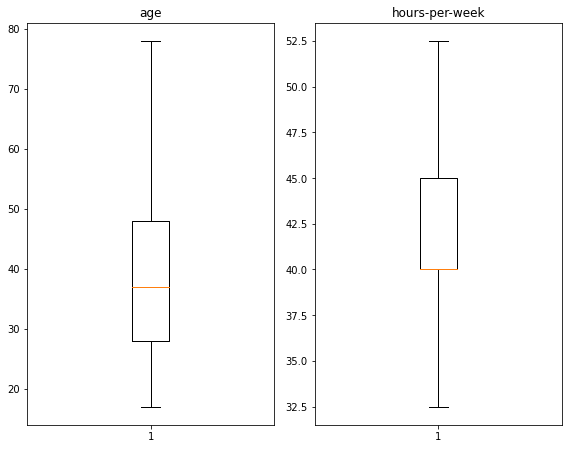

In [26]:
plt.figure(figsize=(20,30))

for i, variable in enumerate(num_col):
                     plt.subplot(5,5,i+1)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)